<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Review CLT, Confidence Intervals, and Hypothesis Testing

---

### Read in the housing data (code provided).

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.datasets import load_boston

data_boston = load_boston()
data = pd.DataFrame(data_boston.data,columns=data_boston.feature_names)
NOX = data['NOX']
AGE = data['AGE']

### 1. Find the mean, standard deviation, and the standard error of the mean for variable `AGE`

In [3]:
print("Mean:\t\t\t {:.4f}.".format(data['AGE'].mean()))
print("Standard deviation:\t {:.4f}.".format(data['AGE'].std()))
print("Standard error:\t\t {:.4f}.".format(data['AGE'].std()/(len(data['AGE']))**0.5))

Mean:			 68.5749.
Standard deviation:	 28.1489.
Standard error:		 1.2514.


In [4]:
# scipy standard error function
from scipy.stats import sem
sem(data['AGE'])

1.2513695252583041

### 2. Generate a 90%, 95%, and 99% confidence interval for `AGE`

You can use the `scipy.stats.t.interval` function to calculate the confidence interval range.

```python
# Endpoints of the range that contains alpha percent of the distribution
stats.t.interval(alpha, df, loc=0, scale=1)	
```

Arguments:
- `df` = the degrees of freedom, will be the length of the vector minus 1.
- `loc` = the mean of the t-distribution (your point estimate - mean of the variable)
- `scale` = the standard deviation of the t-distribution (the standard error of your sample mean)

**Interpret the results from all three confidence intervals.**

In [5]:
from scipy.stats import t

In [6]:
def calculate_tinterval(confidence_level,vector):
    n = len(vector)
    t_interval = t.interval(confidence_level,
                           n-1,
                           loc=vector.mean(),
                           scale=vector.std()/n**0.5)
    return t_interval

In [7]:
for confidence_level in [0.9,0.95,0.99]:
    
    t_interval = calculate_tinterval(confidence_level,AGE)

    print("We are {}% confident that the true mean value for 'AGE' is between {:.2f} and {:.2f} years of age.".format(confidence_level,t_interval[0],t_interval[1]))

We are 0.9% confident that the true mean value for 'AGE' is between 66.51 and 70.64 years of age.
We are 0.95% confident that the true mean value for 'AGE' is between 66.12 and 71.03 years of age.
We are 0.99% confident that the true mean value for 'AGE' is between 65.34 and 71.81 years of age.


Recall that a 99% t confidence interval will be of the form

$$\bar{x}-t \frac{s}{\sqrt{n}} \ , \ \bar{x}+t \frac{s}{\sqrt{n}}$$

where `t` is the critical t-value with 506 observations, i.e. 505 degrees of freedom, and for 99% confidence.

In [8]:
critical_t = t.ppf(0.995,len(data)) # This pulls the critical value for 99.5%, which is appropriate.
print(critical_t)

2.5855804006393113


### 3. Did you rely on the Central Limit Theorem in question 2? Why or why not? Explain.

**A.** _Yes. We don't know whether or not 'AGE' is normally distributed (and by the plot below, it clearly is not), but since the size of our sample n is larger than 30, we can assume that the behavior of X-bar will be normal enough for us to use our t-distribution to generate our confidence intervals._

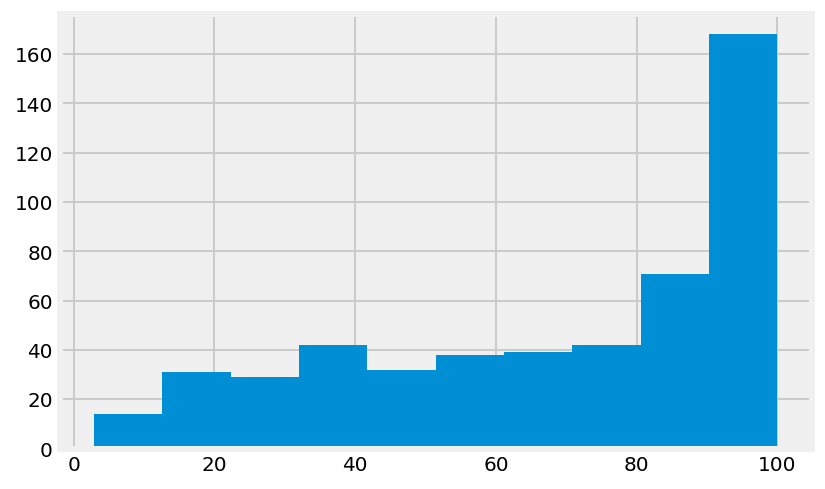

In [9]:
plt.hist(AGE)
plt.show()

### 4. For the variable `NOX`, generate a 95% confidence interval and interpret it.

In [10]:
t_interval = calculate_tinterval(0.95,NOX)

In [11]:
print("We are 95% confident that the true mean value for 'NOX' is between {:.4f} and {:.4f}.".format(t_interval[0],t_interval[1]))

We are 95% confident that the true mean value for 'NOX' is between 0.5446 and 0.5648.


### 5. For the variable `NOX`, test the hypothesis that the mean is equal to the median. 

You may use scipy functions to complete this, but complete all steps listed below.

1. Define hypothesis
2. Set alpha (let alpha = 0.05)
3. Calculate point estimate
4. Calculate test statistic
5. Find the p-value
6. Interpret results

In [12]:
## Step 1: Define hypotheses.
### H_0: mu_NOX = M_NOX
### H_A: mu_NOX != M_NOX

## Step 2: alpha = 0.05.
alpha = 0.05

## Step 3: Calculate point estimate.
sample_mean = NOX.mean()
sample_median = NOX.median()
sample_std = NOX.std()
sample_size = len(NOX)

## Step 4: Calculate test statistic.
t_statistic = (sample_mean - sample_median)/(sample_std/sample_size**0.5)

## Step 5: Find p-value.
## t.sf is survival function, which is 1-cdf at a given value 
## (proportion of values at least as extreme as...)
p_value = t.sf(np.abs(t_statistic), len(NOX)-1) * 2 


## Because our alternative hypothesis is != (rather than greater than or less than),
## we multiply our p-value by 2. (This is called a two-sided test.)
print("Our sample median is {:.4f}.".format(NOX.median()))
print("Our sample mean is {:.4f}.".format(sample_mean))
print("Our t-statistic is {:.6f}.".format(t_statistic))
print("Our p-value is {:.6f}.".format(p_value))

if p_value < alpha:
    print("We reject our null hypothesis and conclude that the true mean NOX value is different from the median NOX value.")
elif p_value > alpha:
    print("We fail to reject our null hypothesis and cannot conclude that the true mean NOX value is different from the median .")
else:
    print("Our test is inconclusive.")

Our sample median is 0.5380.
Our sample mean is 0.5547.
Our t-statistic is 3.240884.
Our p-value is 0.001270.
We reject our null hypothesis and conclude that the true mean NOX value is different from the median NOX value.


In [13]:
from scipy import stats
stats.ttest_1samp(NOX,np.median(NOX))

Ttest_1sampResult(statistic=3.2408837167794102, pvalue=0.001270210999819144)

### 6. What do you notice about the results from Exercise 4 and Exercise 5? 

**If you were going to generalize this to the relationship between hypothesis tests and confidence intervals, what might you say? Be specific.**

**A.** _When we calculated the median, it was 0.538. The 95% confidence interval for our mean contained 0.545 through 0.565. Since the median was outside our 95% confidence interval, this suggests that the true mean would not be equal to our median._

_We then conducted the hypothesis test and found that, at the alpha = 0.05 significance level, we rejected the hypothesis that the mean and median were equal._

_The results of our hypothesis test and confidence interval are in agreement here. Because our significance level (for HT) is alpha, as long as our confidence level (for CI) is 1 - alpha, the results should be in agreement.  
That is, if the value of interest does not lie in our 1 - alpha CI, then testing the hypothesis that the parameter equals the value of interest should be rejected at the alpha significance level. Similarly, if the value of interest *does* lie in our 1 - alpha CI, then testing the hypothesis that the parameter equals the value of interest should *not* be rejected at the alpha significance level._

### 7. For the variable `NOX`, test the hypothesis that the mean is greater than or equal to the median. 

You may use scipy functions to complete this, but complete all steps listed below.

1. Define hypothesis
2. Set alpha (Let alpha = 0.05)
3. Calculate point estimate
4. Calculate test statistic
5. Find the p-value
6. Interpret results

In [14]:
## Step 1: Define hypotheses.
### H_0: mu_NOX >= M_NOX
### H_A: mu_NOX < M_NOX

## Step 2: alpha = 0.05.
alpha = 0.05

## Step 3: Calculate point estimate.
sample_mean = NOX.mean()
sample_median = NOX.median()
sample_std = NOX.std()
sample_size = len(NOX)

## Step 4: Calculate test statistic.
t_statistic = (sample_mean - sample_median)/(sample_std/sample_size**0.5)

## Step 5: Find p-value.
p_value = t.sf((t_statistic), len(NOX)-1)
## Because our alternative hypothesis is < (rather than equal to),
## we DO NOT multiply our p-value by 2. (This is called a one-sided test.)

print("Our sample mean is {:.4f}.".format(sample_mean))
print("Our sample median is {:.4f}.".format(sample_median))
print("Our t-statistic is {:.6f}.".format(t_statistic))
print("Our p-value is {:.6f}.".format(p_value))

if p_value < alpha:
    print("We reject our null hypothesis and conclude that the true mean NOX value is greater than the median NOX value.")
elif p_value > alpha:
    print("We fail to reject our null hypothesis and cannot conclude that the true mean NOX value is greater than the median .")
else:
    print("Our test is inconclusive.")

Our sample mean is 0.5547.
Our sample median is 0.5380.
Our t-statistic is 3.240884.
Our p-value is 0.000635.
We reject our null hypothesis and conclude that the true mean NOX value is greater than the median NOX value.


### 8. Compare the p-values from Exercise 5 and Exercise 7. What do you notice?

**A.** _The p-value in Exercise 6 is exactly twice the p-value in Exercise 8, by construction. This is because of the fact that our alternative hypotheses are different. In Exercise 6, we can reject the null hypothesis for very large values of mu or very small values of mu. Because this is a two-sided test, we double our p-value. In Exercise 8, we can reject the null hypothesis for very small values of mu *but* cannot reject the null hypothesis for very large values of mu. Because we can only reject on one side, we call this a one-sided test. Due to the fact that this is a one-sided test, we do not need to double our p-value._

### 9. Test if the data is ordered or not.

Split the dataset into the first and second half according to the index order. Perform a statistical test if the means of the two groups are the same. Assume equal variances.

In [15]:
t_stat = stats.ttest_ind(data.iloc[int(len(data)/2):,:],data.iloc[:int(len(data)/2),:])

for i, col in enumerate(data.columns):
    print(col+'\t', round(t_stat.statistic[i],2), '\t', round(t_stat.pvalue[i],2))

CRIM	 8.75 	 0.0
ZN	 0.01 	 0.99
INDUS	 5.51 	 0.0
CHAS	 -0.87 	 0.38
NOX	 6.9 	 0.0
RM	 -1.51 	 0.13
AGE	 2.3 	 0.02
DIS	 -3.85 	 0.0
RAD	 15.7 	 0.0
TAX	 13.62 	 0.0
PTRATIO	 5.79 	 0.0
B	 -5.03 	 0.0
LSTAT	 4.1 	 0.0
